### Working with already created model and coefficients
Cuando trabajamos con un modelo y coeficientes ya generados, es mas sencillo

In [113]:
import pyEXP
import EXPtools
import h5py
import numpy as np

In [131]:
model = 'Hernquist'
Hern_config = EXPtools.basis_builder.basis_utils.make_config('sphereSL',lmax=6,nmax=20,
                                             modelname=f'{model}_model.txt',cachename=f'{model}_halo.cache',
                                             numr=201, rmin=1.5, rmax=300, scale=1)
Hern_basis = pyEXP.basis.Basis.factory(Hern_config)
Hern_coefs = pyEXP.coefs.Coefs.factory('Hernquist_halo.h5')

---- SLGridSph::ReadH5Cache: successfully read basis cache <Hernquist_halo.cache>
SphericalSL::orthoTest: worst=2.387674e-02


In [128]:
model = 'NFW'
NFW_config = EXPtools.basis_builder.basis_utils.make_config('sphereSL',lmax=6,nmax=20,
                                             modelname=f'{model}_model.txt',cachename=f'{model}_halo.cache',
                                             numr=201, rmin=1.5, rmax=300, scale=1)
NFW_basis = pyEXP.basis.Basis.factory(NFW_config)
NFW_coefs = pyEXP.coefs.Coefs.factory('NFW_halo.h5')

---- SLGridSph::ReadH5Cache: successfully read basis cache <NFW_halo.cache>
SphericalSL::orthoTest: worst=3.327704e-01


Text(0.5, 0.98, 'Orthogonal tests')

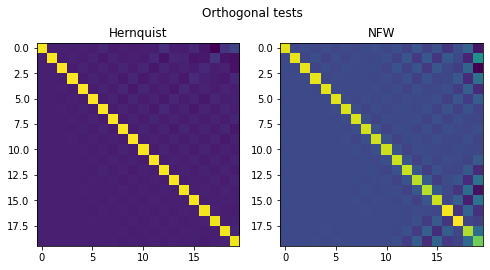

In [129]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].imshow(Hern_basis.orthoCheck()[0])
ax[1].imshow(NFW_basis.orthoCheck()[0])
ax[0].set_title('Hernquist')
ax[1].set_title('NFW')

fig.suptitle('Orthogonal tests')

#### Extraccion de perfiles de las bases

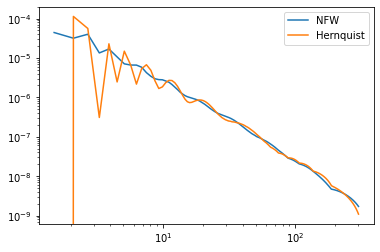

In [132]:
field = 'dens'

rad_NFW, field_NFW = EXPtools.visuals.visualize.spherical_avg_prop(NFW_basis,NFW_coefs, rmin=1.5, rmax=300, nbins=500, log_space=False, time=0, property=field)
rad_Hern, field_Hern = EXPtools.visuals.visualize.spherical_avg_prop(Hern_basis,Hern_coefs, rmin=1.5, rmax=300, nbins=500, log_space=False, time=0, property=field)
plt.plot(rad_NFW, field_NFW, label='NFW')
plt.plot(rad_Hern, field_Hern, label='Hernquist')
plt.xscale('log')
plt.yscale('log')
plt.legend()

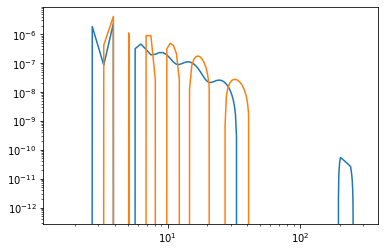

In [126]:
field = 'pot'

rad_NFW, field_NFW = EXPtools.visuals.visualize.spherical_avg_prop(NFW_basis,NFW_coefs, rmin=1.5, rmax=300, nbins=500, log_space=False, time=0, property=field)
rad_Hern, field_Hern = EXPtools.visuals.visualize.spherical_avg_prop(Hern_basis,Hern_coefs, rmin=1.5, rmax=300, nbins=500, log_space=False, time=0, property=field)
plt.plot(rad_NFW, field_NFW)
plt.plot(rad_Hern, field_Hern)
plt.xscale('log')
plt.yscale('log')

### Comparing with empirical values

In [26]:
id = 372754
# Obtained from the header file
HubbleParam  =  0.6774
Omega0  =  0.3089
OmegaLambda  =  0.6911
Redshift  =  2.220446049250313e-16
Time  =  0.9999999999999998 # Is also defined as the scale factor a, since z~0, a~1
with h5py.File(f"subhalo_{id}.hdf5", "r") as file:
    print(file['99/dm'].keys())
    pos = np.array(file['99/dm/Coordinates_centered'])
    radius = np.array(file['99/dm/Distance_to_center'])
    mass = np.full(pos.shape[0],3.1e5/HubbleParam)

<KeysViewHDF5 ['Coordinates', 'Coordinates_centered', 'Distance_to_center', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'Velocities', 'count']>


In [27]:
bins = 500
rmin, rmax = 1.5,300
rbins = np.linspace(1.5,300,500)

In [29]:
emp_dens = EXPtools.basis_builder.makemodel.empirical_density_profile(rbins,pos,mass/sum(mass))

(None, None, Text(0, 0.5, 'mass density'), Text(0.5, 0, 'Radius(kpc)'))

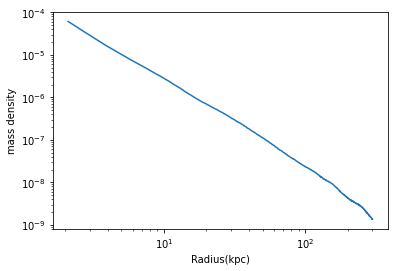

In [30]:
plt.plot(rbins[1:],emp_dens)
plt.xscale('log'),plt.yscale('log'),plt.ylabel('mass density'),plt.xlabel('Radius(kpc)')

#### Modelos base en comparacion al empirico

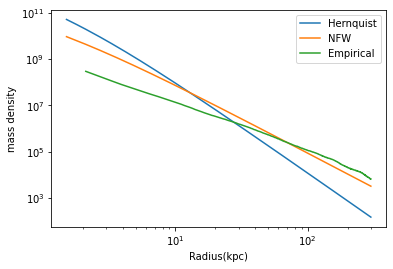

In [71]:
# Comparando con orden cero
emp_dens_nonorm = EXPtools.basis_builder.makemodel.empirical_density_profile(rbins,pos,mass)

fig, ax = plt.subplots(1,1,figsize=(6,4))

read_model = np.loadtxt('Hernquist_model.txt', skiprows=3)
ax.plot(read_model[:,0],read_model[:,1], label='Hernquist')
ax.set_xscale('log')
ax.set_yscale('log')

read_model = np.loadtxt('NFW_model.txt', skiprows=3)
ax.plot(read_model[:,0],read_model[:,1], label='NFW')

ax.plot(rbins[1:],emp_dens_nonorm, label='Empirical')
ax.set_xscale('log'),ax.set_yscale('log'),ax.set_ylabel('mass density'),ax.set_xlabel('Radius(kpc)')

ax.legend()

#### Ahora utilizando los perfiles de las bases
comparando perfil empirico con el obtenido de la expansion completa

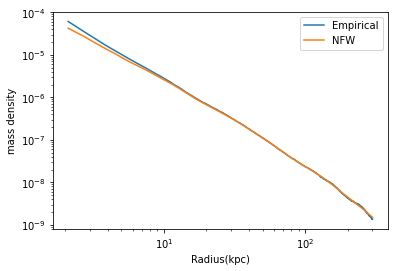

In [41]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(rbins[1:],emp_dens, label='Empirical')
ax.plot(rad_NFW[1:], field_NFW[1:], label='NFW')
#ax.plot(rad_Hern, field_Hern, label='Hernquist')

ax.set_xscale('log'),ax.set_yscale('log'),ax.set_ylabel('mass density'),ax.set_xlabel('Radius(kpc)')
ax.legend()

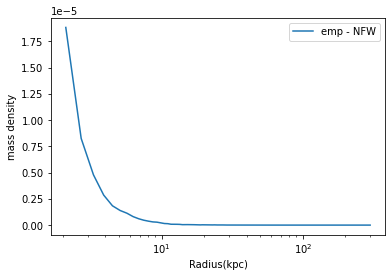

In [63]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(rbins[1:],emp_dens - field_NFW[1:], label='emp - NFW')

ax.set_xscale('log'),ax.set_ylabel('mass density'),ax.set_xlabel('Radius(kpc)')
ax.legend()

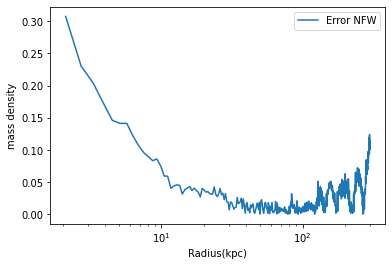

In [64]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(rbins[1:],abs(emp_dens - field_NFW[1:])/emp_dens, label='Error NFW')

ax.set_xscale('log'),ax.set_ylabel('mass density'),ax.set_xlabel('Radius(kpc)')
ax.legend()

#### Comparando slices de Hernquist y NFW

In [92]:
NFWdens0, NFWdens, NFWxgrid = EXPtools.visuals.visualize.slice_fields(NFW_basis,NFW_coefs)

In [94]:
Herndens0, Herndens, Hernxgrid = EXPtools.visuals.visualize.slice_fields(Hern_basis,Hern_coefs)

/tmp/ipykernel_80/1616790750.py:3: RuntimeWarning: invalid value encountered in log10
  NFWcont = ax[0].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
/tmp/ipykernel_80/1616790750.py:5: RuntimeWarning: invalid value encountered in log10
  ax[0].contour(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens), zorder=100, colors='k')
/tmp/ipykernel_80/1616790750.py:8: RuntimeWarning: invalid value encountered in log10
  Herncont = ax[1].contourf(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens))
/tmp/ipykernel_80/1616790750.py:10: RuntimeWarning: invalid value encountered in log10
  ax[1].contour(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens), zorder=100, colors='k')


Text(0.5, 1.0, 'NFW-Hernquist')

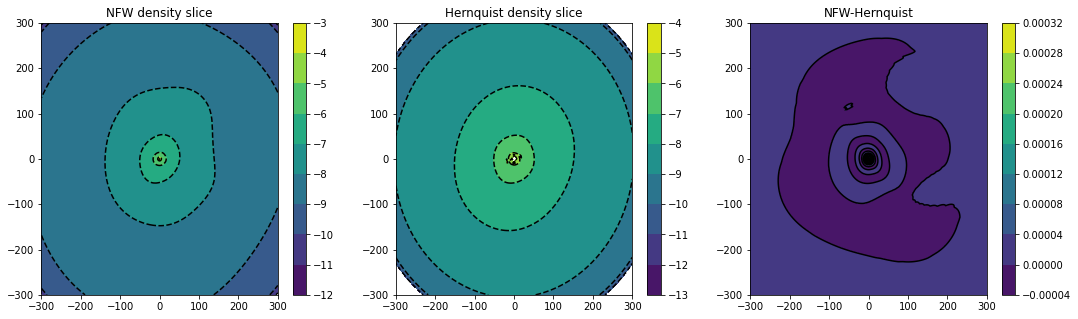

In [111]:
fig, ax = plt.subplots(1,3,figsize=(18,5))

NFWcont = ax[0].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
plt.colorbar(NFWcont)
ax[0].contour(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens), zorder=100, colors='k')
ax[0].set_title('NFW density slice')

Herncont = ax[1].contourf(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens))
plt.colorbar(Herncont)
ax[1].contour(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens), zorder=100, colors='k')
ax[1].set_title('Hernquist density slice')

diffcont = ax[2].contourf(Hernxgrid[0],Hernxgrid[1],NFWdens-Herndens)
plt.colorbar(diffcont)
ax[2].contour(Hernxgrid[0],Hernxgrid[1],NFWdens-Herndens, zorder=100, colors='k')
ax[2].set_title('NFW-Hernquist')

/tmp/ipykernel_80/1554954857.py:3: RuntimeWarning: invalid value encountered in log10
  NFWcont = ax[0].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
/tmp/ipykernel_80/1554954857.py:5: RuntimeWarning: invalid value encountered in log10
  ax[0].contour(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens), zorder=100, colors='k')
/tmp/ipykernel_80/1554954857.py:8: RuntimeWarning: invalid value encountered in log10
  Herncont = ax[1].contourf(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens))
/tmp/ipykernel_80/1554954857.py:10: RuntimeWarning: invalid value encountered in log10
  ax[1].contour(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens), zorder=100, colors='k')


Text(0.5, 1.0, 'Hernquist density slice')

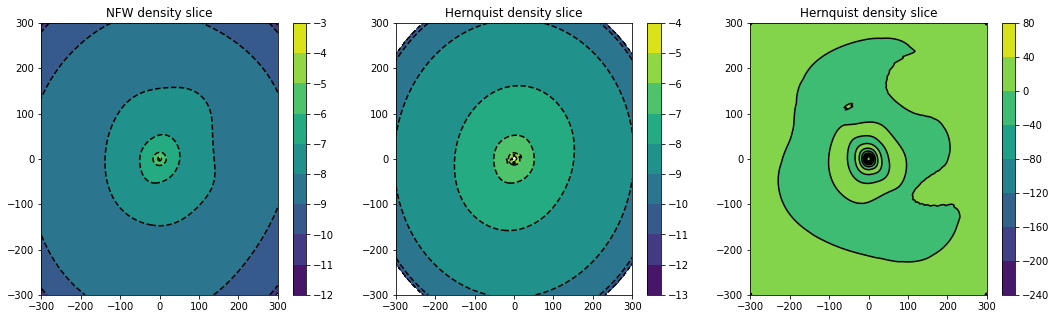

In [112]:
fig, ax = plt.subplots(1,3,figsize=(18,5))

NFWcont = ax[0].contourf(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens))
plt.colorbar(NFWcont)
ax[0].contour(NFWxgrid[0],NFWxgrid[1],np.log10(NFWdens), zorder=100, colors='k')
ax[0].set_title('NFW density slice')

Herncont = ax[1].contourf(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens))
plt.colorbar(Herncont)
ax[1].contour(Hernxgrid[0],Hernxgrid[1],np.log10(Herndens), zorder=100, colors='k')
ax[1].set_title('Hernquist density slice')

diffcont = ax[2].contourf(Hernxgrid[0],Hernxgrid[1],(NFWdens-Herndens)/NFWdens)
plt.colorbar(diffcont)
ax[2].contour(Hernxgrid[0],Hernxgrid[1],(NFWdens-Herndens)/NFWdens, zorder=100, colors='k')
ax[2].set_title('Hernquist density slice')

#### Calculo de un slice empirico?

#### hernquist test

In [65]:
model = 'hernq'
hernq_config = EXPtools.basis_builder.basis_utils.make_config('sphereSL',lmax=6,nmax=20,
                                                              modelname=f'{model}_model.txt',cachename=f'{model}_halo.cache',
                                                              numr=1000, rmin=1.5, rmax=300, scale=1)
hernq_basis = pyEXP.basis.Basis.factory(Hern_config)
hernq_coefs = pyEXP.coefs.Coefs.factory('hernq_halo.h5')

---- SLGridSph::ReadH5Cache: parameter numr: wanted 1000 found 1001
---- SLGridSph::WriteH5Cache cache file <Hernquist_halo.cache> exists
---- SLGridSph::WriteH5Cache: existing file backed up to <Hernquist_halo.cache.bak>
---- SLGridSph::WriteH5Cache: wrote <Hernquist_halo.cache>
SphericalSL::orthoTest: worst=0.00102657


In [67]:
rad_hernq, field_hernq = EXPtools.visuals.visualize.spherical_avg_prop(hernq_basis,hernq_coefs, rmin=1.5, rmax=300, nbins=500, log_space=False, time=0, property=field)

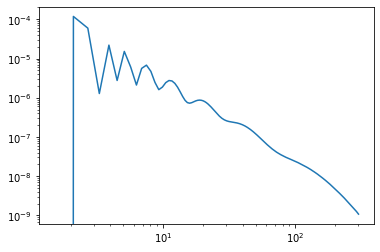

In [68]:
plt.plot(rad_hernq, field_hernq) 
plt.xscale('log')
plt.yscale('log')